In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

visa_df = pd.read_csv('C:\\Users\\swaga\\OneDrive\\Documents\\datafiles\\Visadataset.csv')
cat = visa_df.select_dtypes(include='object').columns
num = visa_df.select_dtypes(exclude='object').columns

In [2]:
visa_df['continent'].value_counts()

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64

In [3]:
visa_df['case_status'].value_counts()

Certified    17018
Denied        8462
Name: case_status, dtype: int64

In [10]:
# I want how many people certified from Asia
# I want how many people denied from Asia
con1 = visa_df['continent'] == 'Asia'
con2 = visa_df['case_status'] == 'Certified'
con3 = visa_df['case_status'] == 'Denied'
certi_con = con1 & con2
deni_con = con1 & con3
visa_df[certi_con]
visa_df[deni_con]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
11,EZYV12,Asia,High School,Y,N,4069,2005,Northeast,70813.0900,Year,Y,Denied
15,EZYV16,Asia,High School,Y,N,4897,1987,West,74108.0200,Year,Y,Denied
...,...,...,...,...,...,...,...,...,...,...,...,...
25450,EZYV25451,Asia,Bachelor's,N,N,3312,2009,Northeast,682.1048,Hour,Y,Denied
25452,EZYV25453,Asia,High School,N,N,70,1995,Northeast,84833.8900,Year,Y,Denied
25454,EZYV25455,Asia,Bachelor's,N,N,1316,2007,South,62844.9700,Year,Y,Denied
25459,EZYV25460,Asia,High School,Y,N,4727,1990,Midwest,53952.8400,Year,Y,Denied


In [16]:
labels = visa_df['continent'].unique()
certi_count,deni_count = [],[]
for i in labels:
    con1 = visa_df['continent'] == i
    con2 = visa_df['case_status'] == 'Certified'
    con3 = visa_df['case_status'] == 'Denied'
    certi_con = con1 & con2
    deni_con = con1 & con3
    certi_count.append(len(visa_df[certi_con]))
    deni_count.append(len(visa_df[deni_con]))
analysis_df = pd.DataFrame(zip(certi_count,deni_count),columns = ['Certified','Denied'],index = labels)
analysis_df

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


<AxesSubplot:>

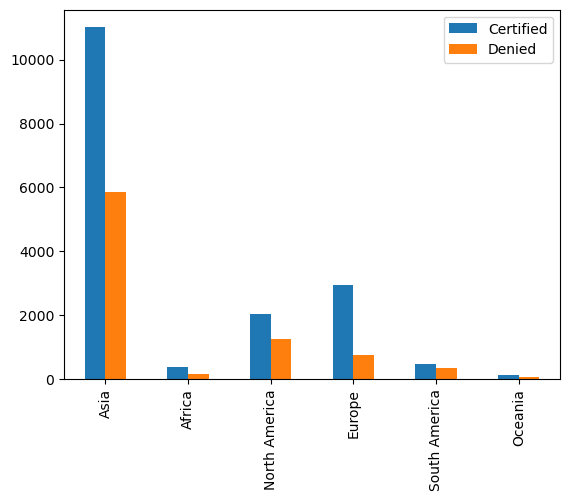

In [18]:
analysis_df.plot(kind='bar')

In [21]:
certi_count

[11012, 397, 2037, 2957, 493, 122]

In [23]:
(11012/16861)*100

65.31047980546823

**Insted of numbers always show the insights using percentage**

In [25]:
col1 = visa_df['continent']
col2 = visa_df['case_status']
analysis_df1 = pd.crosstab(col1,col2)
analysis_df1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<AxesSubplot:xlabel='continent'>

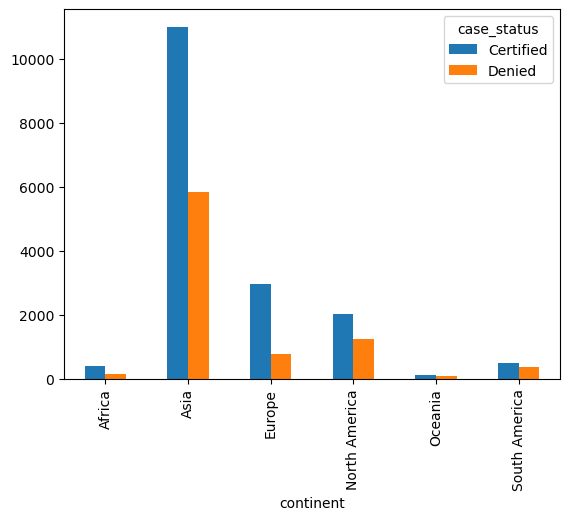

In [26]:
analysis_df1.plot(kind='bar')

In [28]:
col1 = visa_df['continent']
col2 = visa_df['case_status']
col3 = visa_df['education_of_employee']
cols = [col2,col3]
analysis_df2 = pd.crosstab(col1,cols)
analysis_df2

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

<AxesSubplot:xlabel='continent'>

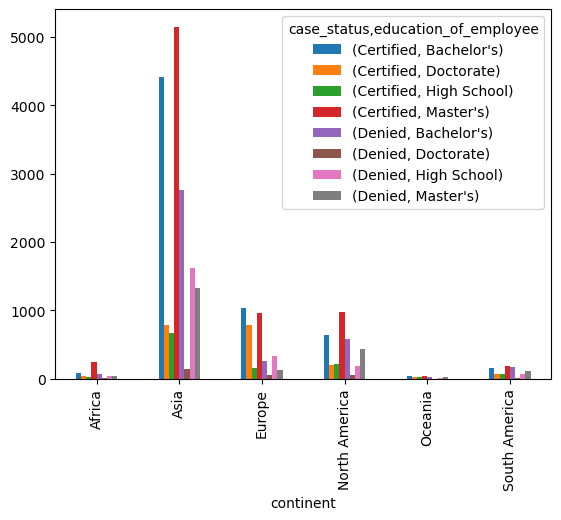

In [29]:
analysis_df2.plot(kind='bar')

In [30]:
col1 = visa_df['continent']
col2 = visa_df['case_status']
col3 = visa_df['education_of_employee']
cols = [col1,col2]
analysis_df3 = pd.crosstab(col3,cols)
analysis_df3

continent                Africa             Asia           Europe         \
case_status           Certified Denied Certified Denied Certified Denied   
education_of_employee                                                      
Bachelor's                   81     62      4407   2761      1040    259   
Doctorate                    43     11       780    143       788     58   
High School                  23     43       676   1614       162    328   
Master's                    250     38      5149   1331       967    130   

continent             North America          Oceania        South America  \
case_status               Certified Denied Certified Denied     Certified   
education_of_employee                                                       
Bachelor's                      641    584        38     28           160   
Doctorate                       207     51        19      3            75   
High School                     210    191        19     17            74   
Master's                        979    429        46     22           184   

continent                     
case_status           Denied  
education_of_employee         
Bachelor's               173  
Doctorate                 14  
High School               63  
Master's                 109

<AxesSubplot:xlabel='education_of_employee'>

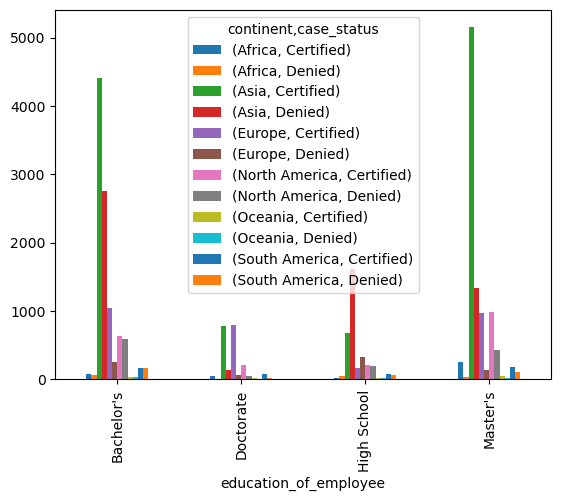

In [31]:
analysis_df3.plot(kind='bar')

In [32]:
col1 = visa_df['continent']
col2 = visa_df['case_status']
col3 = visa_df['education_of_employee']
cols = [col1,col3]
analysis_df4 = pd.crosstab(col2,cols)
analysis_df4

continent                 Africa                                      Asia  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
case_status                                                                  
Certified                     81        43          23      250       4407   
Denied                        62        11          43       38       2761   

continent                                                Europe            \
education_of_employee Doctorate High School Master's Bachelor's Doctorate   
case_status                                                                 
Certified                   780         676     5149       1040       788   
Denied                      143        1614     1331        259        58   

continent              ... North America             Oceania            \
education_of_employee  ...   High School Master's Bachelor's Doctorate   
case_status            ...                                               
Certified              ...           210      979         38        19   
Denied                 ...           191      429         28         3   

continent                                  South America            \
education_of_employee High School Master's    Bachelor's Doctorate   
case_status                                                          
Certified                      19       46           160        75   
Denied                         17       22           173        14   

continent                                   
education_of_employee High School Master's  
case_status                                 
Certified                      74      184  
Denied                         63      109  

[2 rows x 24 columns]

<AxesSubplot:xlabel='case_status'>

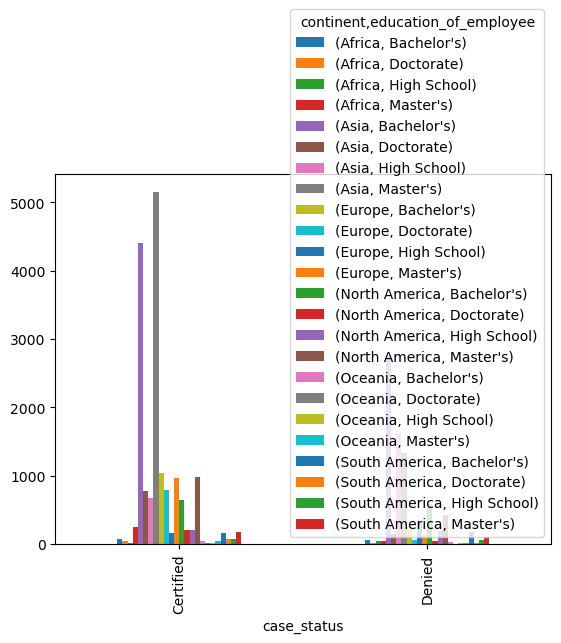

In [33]:
analysis_df4.plot(kind='bar')

In [34]:
col1 = visa_df['continent']
col2 = visa_df['case_status']
col3 = visa_df['education_of_employee']
cols = [col2,col3]
analysis_df5 = pd.crosstab(cols,col1)
analysis_df5

continent                          Africa  Asia  Europe  North America  \
case_status education_of_employee                                        
Certified   Bachelor's                 81  4407    1040            641   
            Doctorate                  43   780     788            207   
            High School                23   676     162            210   
            Master's                  250  5149     967            979   
Denied      Bachelor's                 62  2761     259            584   
            Doctorate                  11   143      58             51   
            High School                43  1614     328            191   
            Master's                   38  1331     130            429   

continent                          Oceania  South America  
case_status education_of_employee                          
Certified   Bachelor's                  38            160  
            Doctorate                   19             75  
            High School                 19             74  
            Master's                    46            184  
Denied      Bachelor's                  28            173  
            Doctorate                    3             14  
            High School                 17             63  
            Master's                    22            109

<AxesSubplot:xlabel='case_status,education_of_employee'>

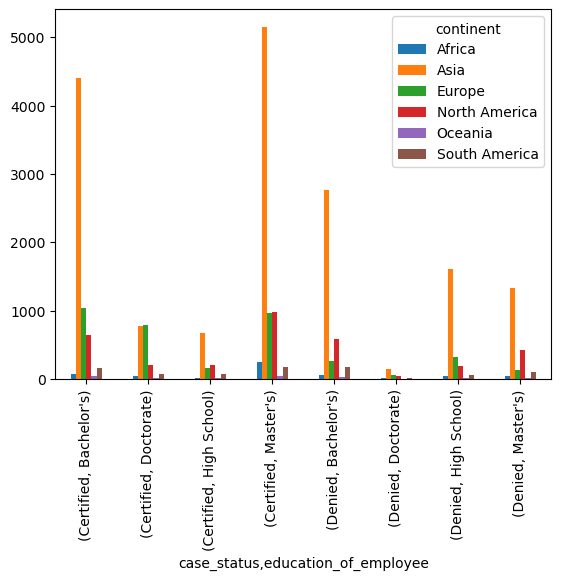

In [35]:
analysis_df5.plot(kind='bar')

**Scatter plots**

- scatter plots will give the relationship between two numerical columns


- How one variable is varying according to another variable 


- If we want get a value we need to do **correlation**

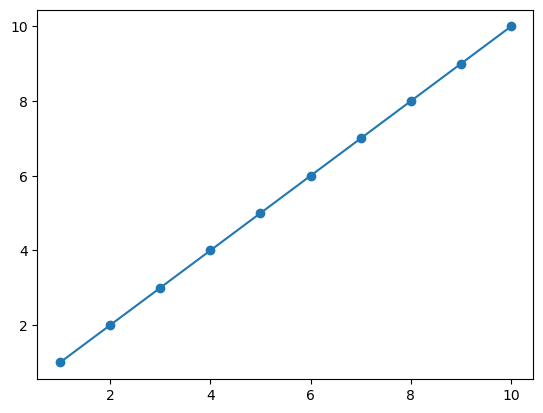

In [37]:
x = range(1,11)
y = range(1,11)
plt.scatter(x,y)
plt.plot(x,y)

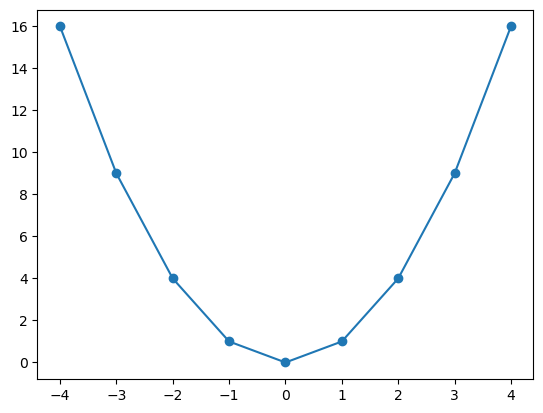

In [41]:
x = range(-4,5)
y = [i**2 for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [42]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

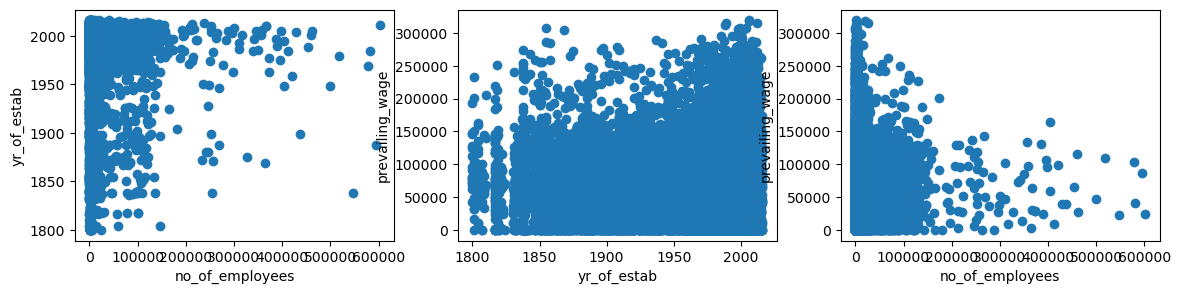

In [43]:
col1 = visa_df['no_of_employees']
col2 = visa_df['yr_of_estab']
col3 = visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.subplot(1,3,1).scatter(col1,col2)
plt.xlabel('no_of_employees')
plt.ylabel('yr_of_estab')
plt.subplot(1,3,2).scatter(col2,col3)
plt.xlabel('yr_of_estab')
plt.ylabel('prevailing_wage')
plt.subplot(1,3,3).scatter(col1,col3)
plt.xlabel('no_of_employees')
plt.ylabel('prevailing_wage')
plt.show()

**correlation**

In [48]:
# visa_df.corr(numeric_only = True) (latest version supported)
visa_df.corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Heat Map**

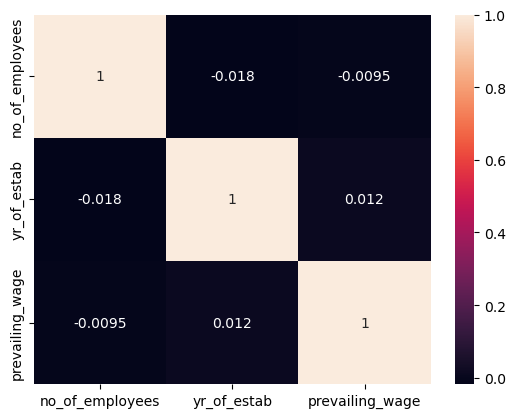

In [50]:
corr_visa = visa_df.corr()
sns.heatmap(corr_visa,annot = True)
plt.show()